In [5]:
'''


'''

import numpy as np
import xarray as xr
import glob
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from matplotlib.colors import LogNorm
import datetime
from matplotlib import gridspec
import h5py as hdf5

def haversine(lat1, lon1, lat_arr, lon_arr):

    R = 6371000.0

    phi_1 = np.deg2rad(lat1)
    phi_2 = np.deg2rad(lat_arr)

    delta_phi = np.deg2rad(lat_arr - lat1)
    delta_lambda = np.deg2rad(lon_arr - lon1)

    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2

    if np.any(a>1.0):
        a[np.where(a>1)] = 1.0

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    meters = R * c
    km = meters / 1000.0

    return km

def isnat(dttm_arr):
    return dttm_arr.view('i8') == np.datetime64('NaT').view('i8')

In [6]:
with open('/edata2/spencer/thesis_data/validation/retr_clr.bin', 'rb') as f:
    npixs_clr = np.fromfile(f, sep='', count=1, dtype='int')[0]
    a2cs_time_clr = np.fromfile(f, sep='', count=npixs_clr*6, dtype='int16').reshape(npixs_clr, 6)
    a2cs_lat_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    a2cs_lon_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    a2cs_sst_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    a2cs_tpw_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    a2cs_wsp_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    a2cs_cwp_clr = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_lat_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_lon_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_sst_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_tpw_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_wsp_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')
    rss_cwp_clr   = np.fromfile(f, sep='', count=npixs_clr, dtype='f')

with open('/edata2/spencer/thesis_data/validation/retr_cld.bin', 'rb') as f:
    npixs_cld = np.fromfile(f, sep='', count=1, dtype='int')[0]
    a2cs_time_cld = np.fromfile(f, sep='', count=npixs_cld*6, dtype='int16').reshape(npixs_cld, 6)
    a2cs_lat_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    a2cs_lon_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    a2cs_sst_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    a2cs_tpw_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    a2cs_wsp_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    a2cs_cwp_cld = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_lat_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_lon_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_sst_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_tpw_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_wsp_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')
    rss_cwp_cld   = np.fromfile(f, sep='', count=npixs_cld, dtype='f')

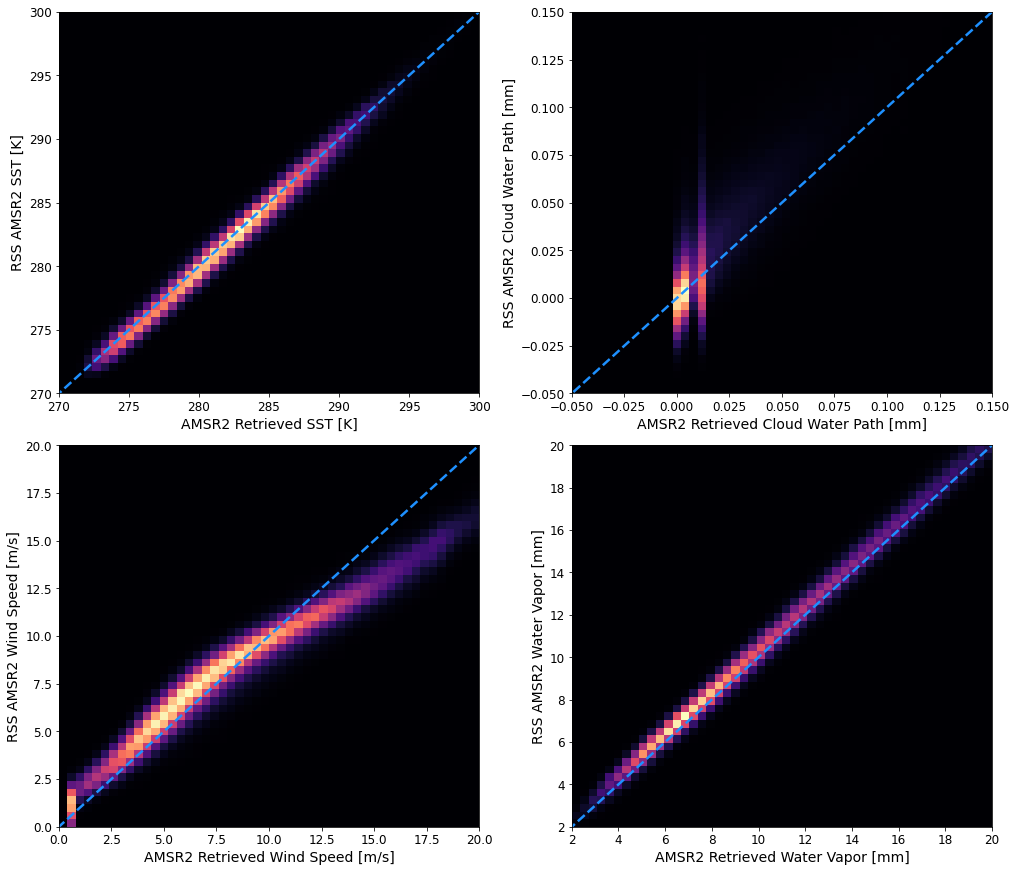

In [7]:
one2one = np.arange(-1000,1000)


fig  = plt.figure(figsize=[14,12], constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])



im1 = ax1.hist2d(a2cs_sst_clr,rss_sst_clr, bins=50, range=[[270,300],[270,300]], facecolor='k', cmap='magma')
im2 = ax2.hist2d(a2cs_cwp_clr,rss_cwp_clr, bins=50, range=[[-0.05,.15],[-0.05,.15]], facecolor='k', cmap='magma')
im3 = ax3.hist2d(a2cs_wsp_clr,rss_wsp_clr, bins=50, range=[[0,20],[0,20]], facecolor='k', cmap='magma')
im4 = ax4.hist2d(a2cs_tpw_clr,rss_tpw_clr, bins=50, range=[[2,20],[2,20]], facecolor='k', cmap='magma')


ax1.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax2.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax3.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax4.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)

ax1.set_xlabel('AMSR2 Retrieved SST [K]', fontsize=14)
ax2.set_xlabel('AMSR2 Retrieved Cloud Water Path [mm]', fontsize=14)
ax3.set_xlabel('AMSR2 Retrieved Wind Speed [m/s]', fontsize=14)
ax4.set_xlabel('AMSR2 Retrieved Water Vapor [mm]', fontsize=14)

ax1.set_ylabel('RSS AMSR2 SST [K]', fontsize=14)
ax2.set_ylabel('RSS AMSR2 Cloud Water Path [mm]', fontsize=14)
ax3.set_ylabel('RSS AMSR2 Wind Speed [m/s]', fontsize=14)
ax4.set_ylabel('RSS AMSR2 Water Vapor [mm]', fontsize=14)

ax1.tick_params('both', labelsize=12)
ax2.tick_params('both', labelsize=12)
ax3.tick_params('both', labelsize=12)
ax4.tick_params('both', labelsize=12)

plt.show()

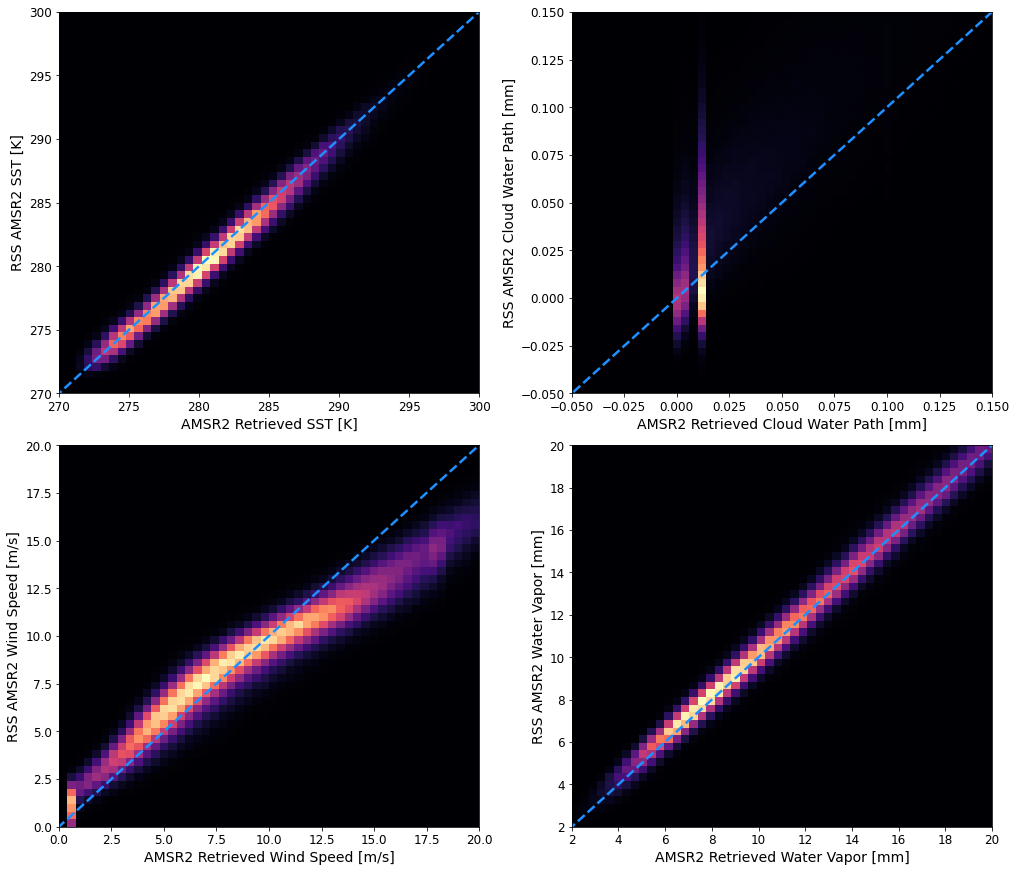

In [8]:
one2one = np.arange(-1000,1000)


fig  = plt.figure(figsize=[14,12], constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

ax1 = fig.add_subplot(spec[0, 0])
ax2 = fig.add_subplot(spec[0, 1])
ax3 = fig.add_subplot(spec[1, 0])
ax4 = fig.add_subplot(spec[1, 1])



im1 = ax1.hist2d(a2cs_sst_cld,rss_sst_cld, bins=50, range=[[270,300],[270,300]], facecolor='k', cmap='magma')
im2 = ax2.hist2d(a2cs_cwp_cld,rss_cwp_cld, bins=50, range=[[-0.05,.15],[-0.05,.15]], facecolor='k', cmap='magma')
im3 = ax3.hist2d(a2cs_wsp_cld,rss_wsp_cld, bins=50, range=[[0,20],[0,20]], facecolor='k', cmap='magma')
im4 = ax4.hist2d(a2cs_tpw_cld,rss_tpw_cld, bins=50, range=[[2,20],[2,20]], facecolor='k', cmap='magma')


ax1.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax2.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax3.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax4.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)

ax1.set_xlabel('AMSR2 Retrieved SST [K]', fontsize=14)
ax2.set_xlabel('AMSR2 Retrieved Cloud Water Path [mm]', fontsize=14)
ax3.set_xlabel('AMSR2 Retrieved Wind Speed [m/s]', fontsize=14)
ax4.set_xlabel('AMSR2 Retrieved Water Vapor [mm]', fontsize=14)

ax1.set_ylabel('RSS AMSR2 SST [K]', fontsize=14)
ax2.set_ylabel('RSS AMSR2 Cloud Water Path [mm]', fontsize=14)
ax3.set_ylabel('RSS AMSR2 Wind Speed [m/s]', fontsize=14)
ax4.set_ylabel('RSS AMSR2 Water Vapor [mm]', fontsize=14)

ax1.tick_params('both', labelsize=12)
ax2.tick_params('both', labelsize=12)
ax3.tick_params('both', labelsize=12)
ax4.tick_params('both', labelsize=12)

plt.show()

In [9]:
with open('/edata2/spencer/thesis_data/validation/buoy_clr.bin', 'rb') as f:
    nbuoy_clr = np.fromfile(f, sep='', count=1, dtype='int')[0]
    ba2cs_sst_clr = np.fromfile(f, sep='', count=nbuoy_clr, dtype='float')
    ba2cs_wsp_clr = np.fromfile(f, sep='', count=nbuoy_clr, dtype='float')
    buoy_sst_clr = np.fromfile(f, sep='', count=nbuoy_clr, dtype='float')
    buoy_wsp_clr = np.fromfile(f, sep='', count=nbuoy_clr, dtype='float')

In [10]:
with open('/edata2/spencer/thesis_data/validation/buoy_cld.bin', 'rb') as f:
    nbuoy_cld = np.fromfile(f, sep='', count=1, dtype='int')[0]
    ba2cs_sst_cld = np.fromfile(f, sep='', count=nbuoy_cld, dtype='float')
    ba2cs_wsp_cld = np.fromfile(f, sep='', count=nbuoy_cld, dtype='float')
    buoy_sst_cld = np.fromfile(f, sep='', count=nbuoy_cld, dtype='float')
    buoy_wsp_cld = np.fromfile(f, sep='', count=nbuoy_cld, dtype='float')

(275.0, 300.0)

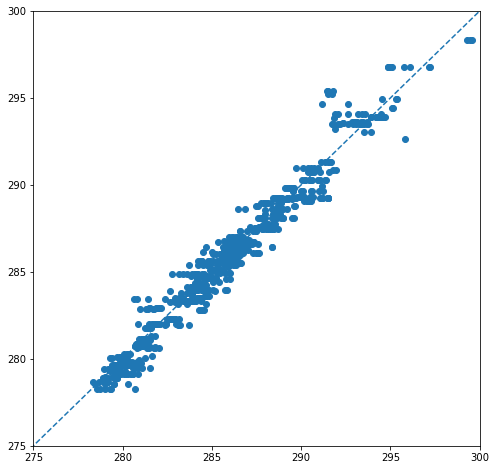

In [11]:
#---SST

plt.figure(figsize=[8,8])
plt.scatter(ba2cs_sst_cld, buoy_sst_cld)
plt.plot(np.arange(0,1000),np.arange(0,1000), linestyle='--')
plt.xlim(275,300)
plt.ylim(275,300)

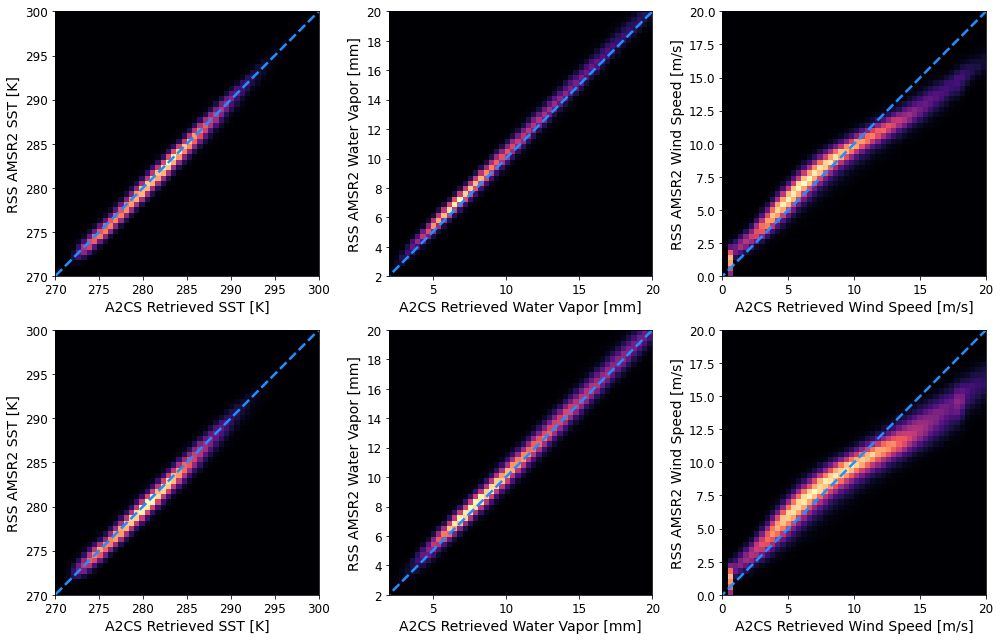

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=[14,9], tight_layout=True)

ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[0,2]
ax4 = ax[1,0]
ax5 = ax[1,1]
ax6 = ax[1,2]

im1 = ax1.hist2d(a2cs_sst_clr,rss_sst_clr, bins=50, range=[[270,300],[270,300]], facecolor='k', cmap='magma')
im2 = ax2.hist2d(a2cs_tpw_clr,rss_tpw_clr, bins=50, range=[[2,20],[2,20]], facecolor='k', cmap='magma')
im3 = ax3.hist2d(a2cs_wsp_clr,rss_wsp_clr, bins=50, range=[[0,20],[0,20]], facecolor='k', cmap='magma')
im4 = ax4.hist2d(a2cs_sst_cld,rss_sst_cld, bins=50, range=[[270,300],[270,300]], facecolor='k', cmap='magma')
im5 = ax5.hist2d(a2cs_tpw_cld,rss_tpw_cld, bins=50, range=[[2,20],[2,20]], facecolor='k', cmap='magma')
im6 = ax6.hist2d(a2cs_wsp_cld,rss_wsp_cld, bins=50, range=[[0,20],[0,20]], facecolor='k', cmap='magma')


ax1.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax2.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax3.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax4.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax5.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)   
ax6.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)                                                            

ax1.set_xlabel('A2CS Retrieved SST [K]', fontsize=14)
ax2.set_xlabel('A2CS Retrieved Water Vapor [mm]', fontsize=14)
ax3.set_xlabel('A2CS Retrieved Wind Speed [m/s]', fontsize=14)
ax4.set_xlabel('A2CS Retrieved SST [K]', fontsize=14)
ax5.set_xlabel('A2CS Retrieved Water Vapor [mm]', fontsize=14)
ax6.set_xlabel('A2CS Retrieved Wind Speed [m/s]', fontsize=14)

ax1.set_ylabel('RSS AMSR2 SST [K]', fontsize=14)
ax2.set_ylabel('RSS AMSR2 Water Vapor [mm]', fontsize=14)
ax3.set_ylabel('RSS AMSR2 Wind Speed [m/s]', fontsize=14)
ax4.set_ylabel('RSS AMSR2 SST [K]', fontsize=14)
ax5.set_ylabel('RSS AMSR2 Water Vapor [mm]', fontsize=14)
ax6.set_ylabel('RSS AMSR2 Wind Speed [m/s]', fontsize=14)

ax1.tick_params('both', labelsize=12)
ax2.tick_params('both', labelsize=12)
ax3.tick_params('both', labelsize=12)
ax4.tick_params('both', labelsize=12)
ax5.tick_params('both', labelsize=12)
ax6.tick_params('both', labelsize=12)

plt.show()

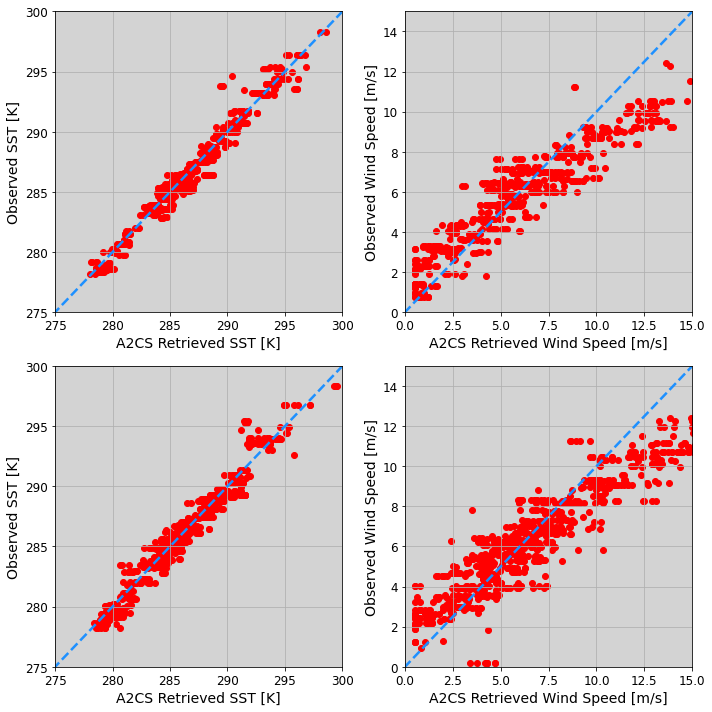

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=[10,10], tight_layout=True)

ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1]

ax1.scatter(ba2cs_sst_clr, buoy_sst_clr, c='r')
ax2.scatter(ba2cs_wsp_clr, buoy_wsp_clr, c='r')
ax3.scatter(ba2cs_sst_cld, buoy_sst_cld, c='r')
ax4.scatter(ba2cs_wsp_cld, buoy_wsp_cld, c='r')

ax1.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax2.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax3.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)
ax4.plot(one2one,one2one, linestyle='--', color='dodgerblue', linewidth=2.5)

ax1.set_xlim(275,300)
ax1.set_ylim(275,300)
ax2.set_xlim(0,15)
ax2.set_ylim(0,15)
ax3.set_xlim(275,300)
ax3.set_ylim(275,300)
ax4.set_xlim(0,15)
ax4.set_ylim(0,15)

ax1.tick_params('both', labelsize=12)
ax2.tick_params('both', labelsize=12)
ax3.tick_params('both', labelsize=12)
ax4.tick_params('both', labelsize=12)

ax1.set_facecolor('lightgray')
ax2.set_facecolor('lightgray')
ax3.set_facecolor('lightgray')
ax4.set_facecolor('lightgray')

ax1.set_xlabel('A2CS Retrieved SST [K]', fontsize=14)
ax1.set_ylabel('Observed SST [K]', fontsize=14)
ax2.set_xlabel('A2CS Retrieved Wind Speed [m/s]', fontsize=14)
ax2.set_ylabel('Observed Wind Speed [m/s]', fontsize=14)
ax3.set_xlabel('A2CS Retrieved SST [K]', fontsize=14)
ax3.set_ylabel('Observed SST [K]', fontsize=14)
ax4.set_xlabel('A2CS Retrieved Wind Speed [m/s]', fontsize=14)
ax4.set_ylabel('Observed Wind Speed [m/s]', fontsize=14)

ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

plt.show()